In [ ]:
**단계 1:** 파이썬 패키지 import

In [2]:
# 행과 열로 구성된 데이터를 사용 (pandas)하기 위해 필요한 패키지를 import합니다.
# 본 예제에서는 사이킷런을 사용하며, 먼저 전국주태가격 지수 DB (csv 파일)을 불러옵니다.

import pandas as pd
import matplotlib
import sklearn

df = pd.read_csv("economy.csv", parse_dates =["date"], index_col ="date") 

# dropna는 누락이 된 데이터를 제거합니다.
# 실제 데이터는 여러가지 이유로 독립변수가 특징행렬의 데이터 중 일부가 누락되는 경우가 발생합니다.
# 이때 누락된 데이터는 NAN (not a number)를 의미하며, dropna를 사용하여 누락된 데이터를 제거합니다.

df = df.dropna()
df.head()

,tradeprice_sido_n1,region_cd,tradeprice_sido,year,month,building_type,construction_realized_amount,cd,spirit_deposit_rate,exchange_rate,composite_stock_price_index,economy_growth,exchequer_bond_three,household_loan_all,mortgage_all,numberofnosells,unsalenum_c
date,,,,,,,,,,,,,,,,,
2010-01-01,93.4,45000,93.3,2010,1,7,6500576.0,2.88,3.93,1156.5,1682.16,2.2,4.29,548723.3,338666.3,0.0,0.0
2010-01-01,83.9,30000,83.1,2010,1,0,6500576.0,2.88,3.93,1156.5,1682.16,2.2,4.29,548723.3,338666.3,3042.0,323.0
2010-01-01,92.7,30000,92.3,2010,1,7,6500576.0,2.88,3.93,1156.5,1682.16,2.2,4.29,548723.3,338666.3,3042.0,323.0
2010-01-01,80.8,30000,79.7,2010,1,1,6500576.0,2.88,3.93,1156.5,1682.16,2.2,4.29,548723.3,338666.3,3042.0,323.0
2010-01-01,81.8,30000,81.8,2010,1,3,6500576.0,2.88,3.93,1156.5,1682.16,2.2,4.29,548723.3,338666.3,3042.0,323.0


**단계 2:** 학습과 테스트용 데이터 확인

In [3]:
# 학습에 사용하는 데이터는 2006년 이후부터 2017년 사이의 데이터를 사용합니다.
# 테스트는 2017년 이후의 데이터를 사용합니다.
# 데이터는 16개의 속성을 가지고 있으며, 훈련데이터는 5,560개 테스트 데이터는 992개 입니다.

train = df[(df.year > 2006) & (df.year < 2017)]
test = df[df.year >= 2017]

feature_names = ['region_cd', 'year', 'month', 'building_type',
                 'tradeprice_sido', 'construction_realized_amount','cd',
                 'spirit_deposit_rate','exchange_rate','composite_stock_price_index',
                 'economy_growth','exchequer_bond_three','household_loan_all',
                 'mortgage_all','numberofnosells','unsalenum_c']

X_train = train[feature_names]
X_test = test[feature_names]

lable_name = "tradeprice_sido_n1"
Y_train = train[lable_name]
Y_test = test[lable_name]

print(X_train.shape)
print(X_test.shape)

(5560, 16)
(992, 16)


**단계 3:** 선형회귀를 통해 얻은 모델의 스코어와 계수 확인

In [4]:
# 선형회귀를 통해 얻은 값들을 확인합니다.
# LinearRegression함수를 통해 선형 회귀를 위한 정보들을 입력합니다.
# fit_intercept는 선형회귀를 통해 얻는 모델에 상수항 (y절편)을 포함할 것인지 말지를 의미합니다.
# normalize는 정규화 과정을 거친 데이터를 사용할 것인지를 의미합니다.
# n_jobs는 모델의 계산에 사용할 작업의 갯수를 의미합니다.
# lm.fit()함수를 통해 훈련 데이터 셋에서 모델을 생성하고, lm.score()함수를 통해 모델의 성능을 확인합니다.

from sklearn.linear_model import LinearRegression

lm = LinearRegression(fit_intercept=True, normalize=True, n_jobs=None)
lm.fit(X_train, Y_train)
accuracy = lm.score(X_test, Y_test)
print("Linear Regression test file accuracy:"+str(accuracy))

lm.coef_

Linear Regression test file accuracy:0.7960327933054951


array([ 3.51896797e-06, -1.71715684e-01, -5.85130446e-03, -1.48964006e-02,
        9.79620046e-01, -1.94257889e-08,  3.17369529e-01, -2.01082058e-01,
        1.47889144e-04,  1.00122036e-03,  2.30943196e-01,  2.53803737e-02,
       -3.12292845e-06,  1.23915308e-05, -1.68226873e-05, -7.31652503e-06])

**단계 4:** 계수값을 이용한 상관관계 확인

In [5]:
# 선형회귀를 통해 얻은 결과에서 상관관계를 확인합니다.
# 상관관계는 결과를 얻는데 어떠한 속성에 영향을 주는지 확인하는데 좋은 지표입니다.
# 예제에서, 어떤 속성이 결과를 얻는데 큰 영향을 주었나요 ?

X_Cols = X_train.rename(columns= {'region_cd': '지역코드(시도)', 'year': '연도', 'month':'월',  'building_type': '부동산타입',  
                               'tradeprice_sido' : '매매가격지수(시도)', 'construction_realized_amount' : '건설기성액(백만원)', "cd": "cd(91일물)",
                                'spirit_deposit_rate': '정기예금금리', 'exchange_rate': '환율', 'composite_stock_price_index': '종합주가지수',
                               'economy_growth': '경제성장률','exchequer_bond_three' : '국고채3년','household_loan_all': '가계대출액(전국)',
                               'mortgage_all' : '주택대출액(전국)', 'numberofnosells':'미분양 가구수(시도)','unsalenum_c':'공사완료후 미분양(민간,시도)' })

print(X_train.columns)
coefs = pd.DataFrame(zip(X_Cols.columns,lm.coef_), columns = ['features', 'coefficients'])

coefs.reindex(coefs.coefficients.abs().sort_values(ascending=False).index)

Index(['region_cd', 'year', 'month', 'building_type', 'tradeprice_sido',
       'construction_realized_amount', 'cd', 'spirit_deposit_rate',
       'exchange_rate', 'composite_stock_price_index', 'economy_growth',
       'exchequer_bond_three', 'household_loan_all', 'mortgage_all',
       'numberofnosells', 'unsalenum_c'],
      dtype='object')


,features,coefficients
4,매매가격지수(시도),9.796200e-01
6,cd(91일물),3.173695e-01
10,경제성장률,2.309432e-01
7,정기예금금리,-2.010821e-01
1,연도,-1.717157e-01
11,국고채3년,2.538037e-02
3,부동산타입,-1.489640e-02
2,월,-5.851304e-03
9,종합주가지수,1.001220e-03
8,환율,1.478891e-04


0.24443040639185176


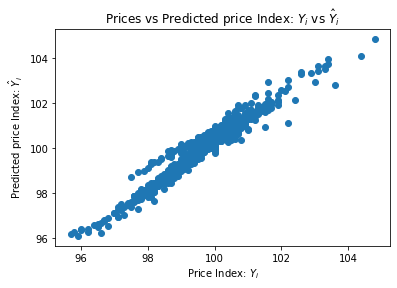

In [6]:
# 학습된 모델의 성능을 평가합니다.
# 학습된 모델의 그래프로 그리고, MSE값을 확인합니다.
# MSE는 오차의 제곱의 평균을 계산한 값입니다.
# 즉 값이 작을수록 실제 값과의 차이가 적음을 의미합니다.

%matplotlib inline
import matplotlib.pyplot as plt

Y_pred = lm.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("Price Index: $Y_i$")
plt.ylabel("Predicted price Index: $\hat{Y}_i$")
plt.title("Prices vs Predicted price Index: $Y_i$ vs $\hat{Y}_i$")

mse = sklearn.metrics.mean_squared_error(Y_test, Y_pred)
print (mse)